### From Scratch Implemetation of a Multi Layer Perceptron with Backpropagation
### Author: @Samashi47

### 0- Imports:

In [79]:
import chadMLP as chad
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, auc, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

### 1- Loading Datasets:

In [80]:
iris = datasets.load_iris()

### 2- Loading Datasets:

In [81]:
X_iris = iris.data
y_iris = iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=None)

### 3- Training:

#### 3.1- Training on Iris Dataset:

##### 3.1.1- Fitting the model:

In [82]:
mlp_iris = chad.MLPClassifier(nFeats=X_iris.shape[1], 
                              hlayers=[6], 
                              nClasses=np.unique(y_iris).shape[0], 
                              layer_activations=['relu','sigmoid'], 
                              alpha=0.01)
mlp_iris.fit(X_train_iris, y_train_iris, epochs=1000)
y_pred_iris = mlp_iris.predict(X_test_iris)

##### 3.1.2- Classification report:

In [83]:
print(classification_report(y_test_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.67      0.80         6
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30



##### 3.1.3- Confusion matrix:

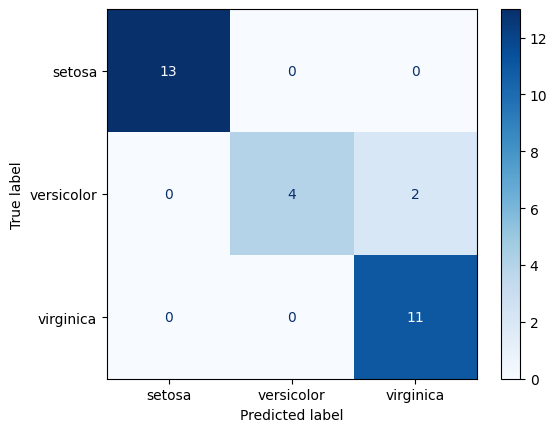

In [84]:
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test_iris, y_pred=y_pred_iris, display_labels=iris.target_names, cmap='Blues')
plt.show()

##### 3.1.4- ROC Curve

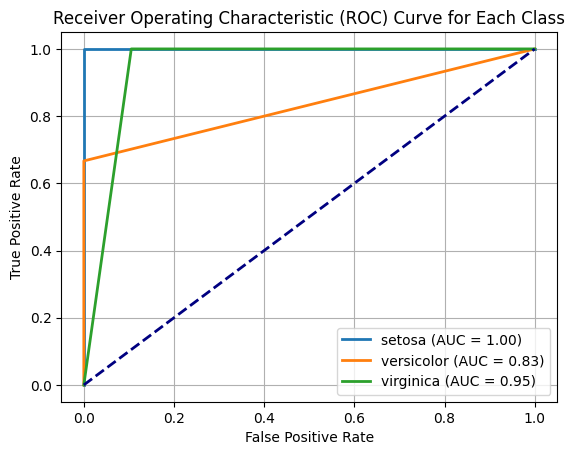

In [85]:
y_test_iris_bin = label_binarize(y_test_iris, classes=np.unique(y_iris))
y_pred_iris_bin = label_binarize(y_pred_iris, classes=np.unique(y_iris))

fpr_iris = dict()
tpr_iris = dict()
thresholds = dict()
auc_iris = dict()

for i in range(y_test_iris_bin.shape[1]):
    fpr_iris[i], tpr_iris[i], _ = roc_curve(y_test_iris_bin[:, i], y_pred_iris_bin[:, i])
    auc_iris[i] = roc_auc_score(y_test_iris_bin[:, i], y_pred_iris_bin[:, i])

for i in range(y_test_iris_bin.shape[1]):
    plt.plot(fpr_iris[i], tpr_iris[i], lw=2, label=f'{iris.target_names[i]} (AUC = {auc_iris[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()